In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/Colab Notebooks/1849.csv"

!pip install pycaret
!pip install shap
import pandas as pd
import numpy as np
import pycaret
from pycaret.classification import *
from pycaret.regression import *

Mounted at /content/gdrive
     |████████████████████████████████| 266kB 5.8MB/s 
     |████████████████████████████████| 1.7MB 24.8MB/s 
     |████████████████████████████████| 1.8MB 36.2MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 245kB 26.5MB/s 
     |████████████████████████████████| 14.2MB 236kB/s 
     |████████████████████████████████| 6.8MB 39.0MB/s 
     |████████████████████████████████| 215kB 40.0MB/s 
     |████████████████████████████████| 276kB 39.1MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 1.1MB 37.8MB/s 
     |████████████████████████████████| 3.2MB 36.6MB/s 
     |████████████████████████████████| 163kB 30.9MB/s 
     |████████████████████████████████| 153kB 33.8MB/s 
     |████████████████████████

In [ ]:
data = pd.read_csv(root_dir)
data.head()

,Channel,Date,Genre,Plus7AMA(000),Plus7Avminviewed,DurMin,Plus7In(000),Plus7PUT(000),LiveAMA(000),LiveAvminviewed,LiveIn(000),LivePUT(000)
0,CBC Total,02/04/2019,Theatre Feature Films Aired on TV,13.2,26,60,.,626,9.6,24,.,556
1,CBC Total,02/04/2019,Analysis and Interpretation,9.7,44,60,2,363,9.7,44,2,332
2,CBC Total,02/04/2019,Reality Programs,9.0,41,60,4,344,9.0,41,4,303
3,CBC Total,02/04/2019,Long-form Documentary,2.8,26,60,1,370,2.8,26,1,353
4,CBC Total,02/04/2019,Animated Television Programs & Films,2.5,6,15,1,737,2.5,6,1,703


In [ ]:
pd.value_counts(data.Genre)

General Entertainment and Human Interest                      21571
News                                                          14796
Ongoing Comedy Series (Sitcoms)                               12232
Ongoing Dramatic Series                                       10890
Animated Television Programs & Films                          10730
Not Applicable                                                 4540
Reality Programs                                               4301
Programs of Comedy Sketches, Improvision, Unscripted Works     4223
Analysis and Interpretation                                    3843
Long-form Documentary                                          3602
Game Shows                                                     3055
Professional Sports                                             977
Theatre Feature Films Aired on TV                               739
Amateur Sports                                                  521
Variety                                         

In [ ]:
classifier_gpu = setup(data = data, target = 'LivePUT(000)', use_gpu = True)
classifier_gpu

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,35.8854,3.871269e+03,62.2066,9.912000e-01,0.0434,0.0317,312.496
lightgbm,Light Gradient Boosting Machine,36.6886,3.996437e+03,63.1899,9.909000e-01,0.0471,0.0328,1.236
rf,Random Forest Regressor,36.5485,4.057645e+03,63.6850,9.907000e-01,0.0434,0.0319,201.724
gbr,Gradient Boosting Regressor,41.9583,5.318154e+03,72.8966,9.878000e-01,0.0527,0.0369,75.070
dt,Decision Tree Regressor,48.8276,7.530844e+03,86.7442,9.828000e-01,0.0594,0.0428,3.897
knn,K Neighbors Regressor,47.5518,7.811988e+03,88.3531,9.821000e-01,0.0529,0.0384,15.103
br,Bayesian Ridge,73.1072,1.191430e+04,109.1299,9.728000e-01,0.1223,0.0866,18.308
ridge,Ridge Regression,73.1095,1.197778e+04,109.4176,9.726000e-01,0.1213,0.0861,1.074
omp,Orthogonal Matching Pursuit,73.3582,1.208518e+04,109.9126,9.724000e-01,0.1230,0.0869,1.136
ada,AdaBoost Regressor,78.4284,1.223883e+04,110.6094,9.720000e-01,0.1987,0.1293,93.015


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1560, verbose=0, warm_start=False)

In [ ]:
model = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,36.3506,3855.9045,62.0959,0.9910,0.0458,0.0326
1,37.2046,3987.3821,63.1457,0.9908,0.0459,0.0332
2,36.7764,3879.2306,62.2835,0.9910,0.0452,0.0329
3,36.6808,4014.9261,63.3634,0.9909,0.0435,0.0322
4,36.4197,3941.4430,62.7809,0.9911,0.0478,0.0328
5,36.3181,3597.1676,59.9764,0.9916,0.0449,0.0325
6,36.8442,4105.4787,64.0740,0.9906,0.0453,0.0326
7,37.5563,4315.7236,65.6942,0.9902,0.0547,0.0344
8,37.5197,4260.3720,65.2715,0.9901,0.0448,0.0326
9,37.3692,4405.2283,66.3719,0.9898,0.0459,0.0327


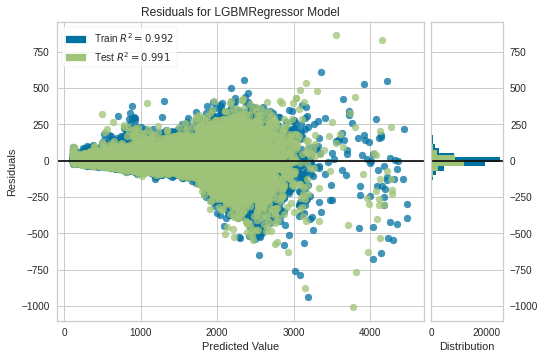

In [ ]:
plot_model(model)

     |████████████████████████████████| 358kB 18.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=599543db8f284b27eb16715ab3b32774ea62d672f792f58362cfad0c825f8a1d
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


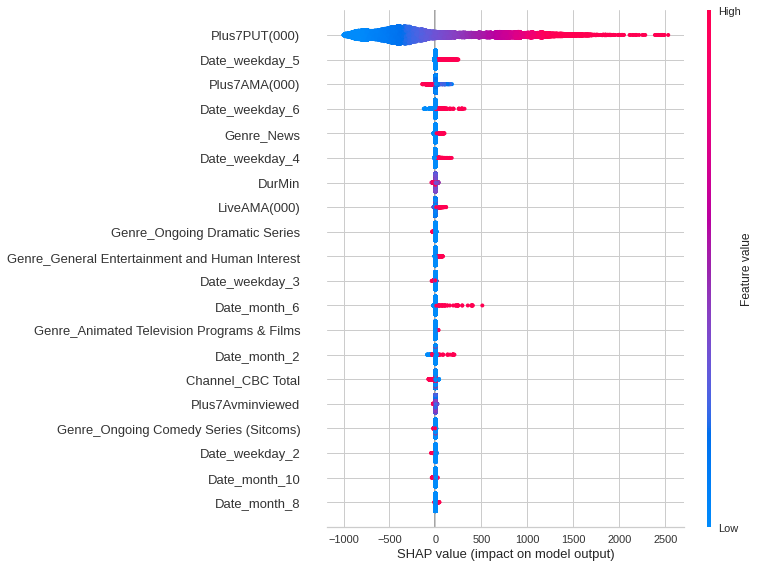

In [ ]:
interpret_model(model)

In [ ]:
predictions = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,36.918,3975.2397,63.0495,0.991,0.0475,0.033


In [ ]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…